## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

<font color='blue'>__Question 1 (1 point).__</font> Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mnist_dataset.csv", index_col=0)
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isna().any().any()

False

In [4]:
target_column = "label"
df_features = df[[col for col in df.columns if col != target_column]]
df_target = df[target_column]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train_X = df_features.iloc[0:60000, :]
df_train_y = df_target.iloc[0:60000]
df_test_X = df_features.iloc[60000:70000, :]
df_test_y = df_target.iloc[60000:70000]

<font color='blue'>__Question 2 (2 points).__</font> Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import time
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
def analyze_RF(rf):
    list_DT = rf.estimators_
    df_hyperparam = pd.DataFrame({"depth":[DT.get_depth() for DT in list_DT], "n_leaves":[DT.get_n_leaves() for DT in list_DT]})
    df_hyperparam.plot.hist(subplots=True, legend=True, layout=(1, 2), figsize=(15,7))
    df_hyperparam.index.name = "Tree"
    display(df_hyperparam)

The training of the RF CLF takes about 46 seconds.

In [9]:
n_estimators=100
time_start = time.time()
rf_clf = RandomForestClassifier(n_estimators=n_estimators)
rf_clf.fit(X=df_train_X, y=np.ravel(df_train_y))
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 44.44841694831848 seconds


The accuracy and classification report of the classifier are shown below. The classification report shows precision, recall, f1-score and support for each label. Since our data is almost balanced, in addition to accuracy, we're seeing a good result in precision, recall and f1-score too.

In [10]:
predictions = rf_clf.predict(df_test_X)
print(classification_report(np.ravel(df_test_y), predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       959
           1       0.99      0.99      0.99      1155
           2       0.97      0.97      0.97      1007
           3       0.96      0.95      0.95      1039
           4       0.97      0.98      0.97       925
           5       0.97      0.97      0.97       921
           6       0.98      0.99      0.98       972
           7       0.97      0.97      0.97      1048
           8       0.95      0.96      0.96       953
           9       0.96      0.94      0.95      1021

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [11]:
from sklearn import metrics
print("Accuracy of RF CLF without any reduction:", metrics.accuracy_score(np.ravel(df_test_y), predictions))

Accuracy of RF CLF without any reduction: 0.9698


,depth,n_leaves
Tree,,
0,39,5081
1,37,4838
2,36,4969
3,33,5050
4,33,5069
...,...,...
95,34,4940
96,34,5034
97,36,4836


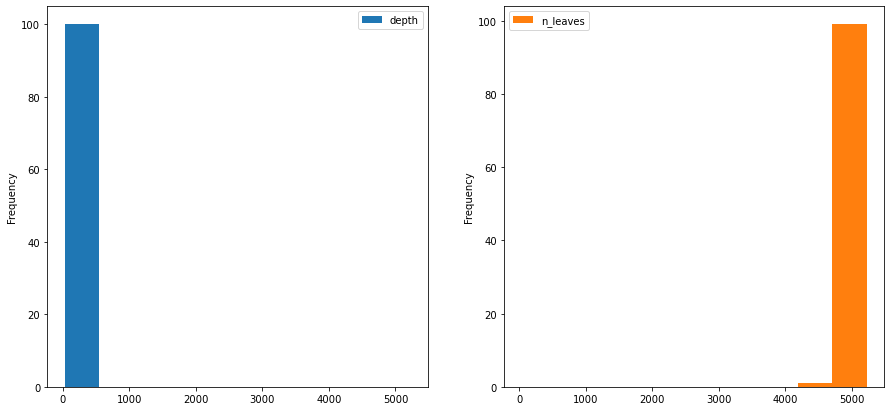

In [12]:
analyze_RF(rf_clf)

<font color='blue'>__Question 3 (4 points).__</font> Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

As you can see below, the time that training takes is 107 seconds which is almost twice the time that training without the reduction takes, but there are other factors that can effect the RF such as the rotation of the dataset.<br/>
For the accuracy, the accuracy is decresead by 2.18 percent which I think can be ignored compare to how much memory we're saving and how simpler the data have become.

In [13]:
from sklearn.decomposition import PCA

In [14]:
time_start = time.time()
pca = PCA(0.95)
df_features_pca_reduced = pca.fit_transform(df_features)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 19.303411960601807 seconds


In [15]:
df_train_X_pca_reduced = df_features_pca_reduced[0:60000]
df_test_X_pca_reduced = df_features_pca_reduced[60000:70000]

In [16]:
time_start = time.time()
rf_clf_PCA_reduced = RandomForestClassifier(n_estimators=n_estimators)
rf_clf_PCA_reduced.fit(X=df_train_X_pca_reduced, y=np.ravel(df_train_y))
print('PCA reduced RF CLF trained! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA reduced RF CLF trained! Time elapsed: 101.72174000740051 seconds


Because of the random forest algorithm, when the 'max_features' parameter is not set, then 'max_features' will be equal to sqrt(n_features) which for the main dataset is sqrt(784) = 28. But when the PCA is applied, the number of features is reduced to 154 so the 'max_features' parameter will be sqrt(154) = 12. So the number of features is reduced from 28 to 12 which as we can see, doesn't effect the time that much and it's because other things such as rotation of the data is effecting the random forest, but the PCA is helping a lot with memory here.

,depth,n_leaves
Tree,,
0,38,7854
1,37,6578
2,33,7273
3,32,8129
4,50,6482
...,...,...
95,41,7102
96,38,7277
97,34,6912


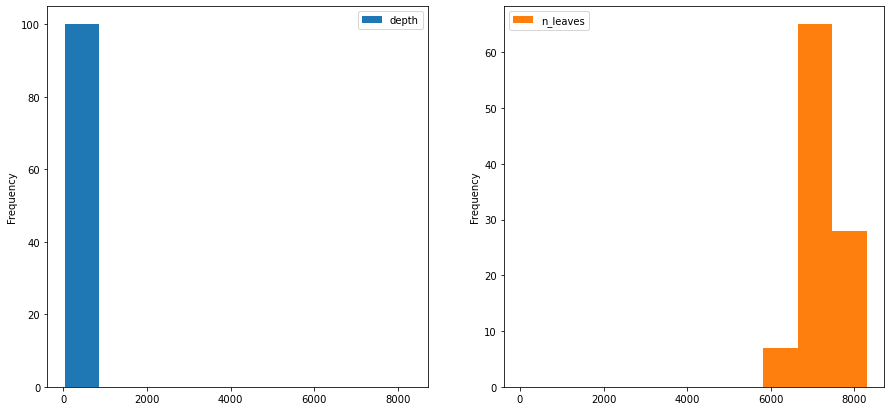

In [17]:
analyze_RF(rf_clf_PCA_reduced)

In [18]:
pca_predictions = rf_clf_PCA_reduced.predict(df_test_X_pca_reduced)
print(classification_report(np.ravel(df_test_y), pca_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       959
           1       0.99      0.99      0.99      1155
           2       0.94      0.95      0.94      1007
           3       0.93      0.92      0.93      1039
           4       0.94      0.96      0.95       925
           5       0.92      0.94      0.93       921
           6       0.97      0.98      0.97       972
           7       0.96      0.95      0.95      1048
           8       0.93      0.91      0.92       953
           9       0.94      0.91      0.92      1021

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [19]:
print("Accuracy of RF CLF using PCA:", metrics.accuracy_score(np.ravel(df_test_y), pca_predictions))

Accuracy of RF CLF using PCA: 0.9487


Since the time wasn't reduced the time, I was wondering can the time reduction be seen in another classification method. As you can see in below, with a KNN classifier, the total time of training and testing is almost half in the PCA reduced data and we have higher accuracy too.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
time_start = time.time()
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X=df_train_X, y=np.ravel(df_train_y))
print('KNN CLF trained! Time elapsed: {} seconds'.format(time.time()-time_start))

KNN CLF trained! Time elapsed: 0.034976959228515625 seconds


In [22]:
time_start = time.time()
predictions_knn = knn.predict(df_test_X)
print(classification_report(np.ravel(df_test_y), predictions_knn))
print('KNN CLF tested! Time elapsed: {} seconds'.format(time.time()-time_start))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       959
           1       0.94      1.00      0.97      1155
           2       0.99      0.94      0.96      1007
           3       0.96      0.96      0.96      1039
           4       0.98      0.96      0.97       925
           5       0.97      0.96      0.97       921
           6       0.97      0.99      0.98       972
           7       0.95      0.96      0.96      1048
           8       0.99      0.92      0.96       953
           9       0.93      0.95      0.94      1021

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

KNN CLF tested! Time elapsed: 48.07457494735718 seconds


In [23]:
print("Accuracy of KNN CLF:", metrics.accuracy_score(np.ravel(df_test_y), predictions_knn))

Accuracy of KNN CLF: 0.964


In [24]:
time_start = time.time()
knn_pca = KNeighborsClassifier(n_neighbors=20)
knn_pca.fit(X=df_train_X_pca_reduced, y=np.ravel(df_train_y))
print('PCA reduced KNN CLF trained! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA reduced KNN CLF trained! Time elapsed: 0.1246650218963623 seconds


In [25]:
time_start = time.time()
pca_predictions_knn = knn_pca.predict(df_test_X_pca_reduced)
print(classification_report(np.ravel(df_test_y), pca_predictions_knn))
print('PCA reduced KNN CLF tested! Time elapsed: {} seconds'.format(time.time()-time_start))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       959
           1       0.95      0.99      0.97      1155
           2       0.99      0.95      0.97      1007
           3       0.97      0.96      0.96      1039
           4       0.98      0.96      0.97       925
           5       0.97      0.96      0.97       921
           6       0.97      0.99      0.98       972
           7       0.95      0.96      0.95      1048
           8       0.99      0.93      0.96       953
           9       0.94      0.95      0.94      1021

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

PCA reduced KNN CLF tested! Time elapsed: 29.460464239120483 seconds


In [27]:
print("Accuracy of KNN CLF using PCA:", metrics.accuracy_score(np.ravel(df_test_y), pca_predictions_knn))

Accuracy of KNN CLF using PCA: 0.9656


<font color='blue'>__Question 4 (4 points).__</font> Use t-SNE to reduce the MNIST dataset, show result graphically.

Using the t-SNE, the time of the reduction was way more than the time of reduction using PCA but the accuracy was a little less than the PCA. The time of training the model on the reduced dataset is almost the same with the pca reduced data training time.

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [29]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(df_features.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.044s...
[t-SNE] Computed neighbors for 70000 samples in 350.887s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

<AxesSubplot:title={'center':'MNIST data reduced using T-SNE'}, xlabel='$feature_1$', ylabel='$feature_2$'>

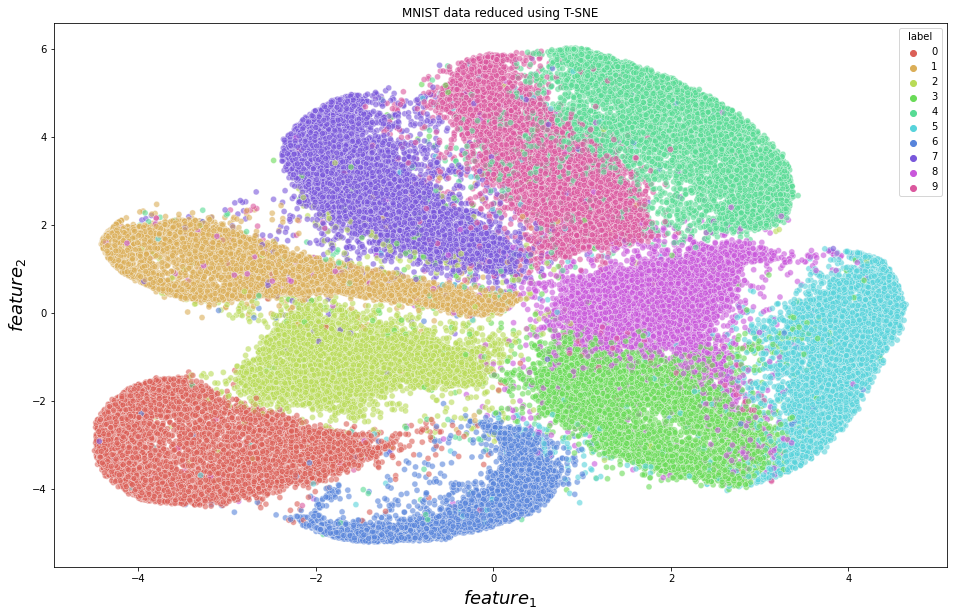

In [30]:
df['tsne-2d-one'] = tsne_result[:, 0]
df['tsne-2d-two'] = tsne_result[:, 1]

plt.figure(figsize=(16,10))
plt.title("MNIST data reduced using T-SNE")
plt.xlabel("$feature_1$", fontsize=18)
plt.ylabel("$feature_2$", fontsize=18)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['label'],
               palette=sns.color_palette('hls', 10),
               alpha=0.6)

In [31]:
df_train_X_tsne_reduced = df_features_pca_reduced[0:60000]
df_test_X_tsne_reduced = df_features_pca_reduced[60000:70000]

In [32]:
time_start = time.time()
rf_clf_tsne_reduced = RandomForestClassifier(n_estimators=n_estimators)
rf_clf_tsne_reduced.fit(X=df_train_X_tsne_reduced, y=np.ravel(df_train_y))
print('TSNE reduced RF CLF trained! Time elapsed: {} seconds'.format(time.time()-time_start))

TSNE reduced RF CLF trained! Time elapsed: 113.5741548538208 seconds


In [33]:
tsne_predictions = rf_clf_tsne_reduced.predict(df_test_X_tsne_reduced)
print(classification_report(np.ravel(df_test_y), tsne_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       959
           1       0.98      0.99      0.98      1155
           2       0.94      0.95      0.95      1007
           3       0.93      0.93      0.93      1039
           4       0.94      0.96      0.95       925
           5       0.93      0.94      0.94       921
           6       0.96      0.97      0.97       972
           7       0.96      0.95      0.96      1048
           8       0.93      0.92      0.93       953
           9       0.94      0.91      0.93      1021

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [34]:
print("Accuracy of RF CLF with T-SNE:", metrics.accuracy_score(np.ravel(df_test_y), tsne_predictions))

Accuracy of RF CLF with T-SNE: 0.9503


Again, I compare the reduced data with a KNN model too, the total time of testing and training the model is less than the training time of the main dataset in part 2. The accuracy was almost the same.

In [35]:
time_start = time.time()
knn_tsne = KNeighborsClassifier(n_neighbors=20)
knn_tsne.fit(X=df_train_X_tsne_reduced, y=np.ravel(df_train_y))
print('t-SNE reduced KNN CLF trained! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE reduced KNN CLF trained! Time elapsed: 0.030025959014892578 seconds


In [38]:
time_start = time.time()
tsne_predictions_knn = knn_tsne.predict(df_test_X_tsne_reduced)
print(classification_report(np.ravel(df_test_y), tsne_predictions_knn))
print('t-SNE reduced KNN CLF tested! Time elapsed: {} seconds'.format(time.time()-time_start))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       959
           1       0.95      0.99      0.97      1155
           2       0.99      0.95      0.97      1007
           3       0.97      0.96      0.96      1039
           4       0.98      0.96      0.97       925
           5       0.97      0.96      0.97       921
           6       0.97      0.99      0.98       972
           7       0.95      0.96      0.95      1048
           8       0.99      0.93      0.96       953
           9       0.94      0.95      0.94      1021

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

t-SNE reduced KNN CLF tested! Time elapsed: 22.261780977249146 seconds


In [39]:
print("Accuracy of KNN CLF with t-SNE:", metrics.accuracy_score(np.ravel(df_test_y), tsne_predictions_knn))

Accuracy of KNN CLF with t-SNE: 0.9656


From what I realized, PCA and t-SNE reduced the data in a way that made the trainig time of the model more. But they both had a good accuracy that was near the main dataset accuracy with a much simpler dataset which shows how powerful they are.<br/>
The time problem didn't exist with the KNN model.

<font color='blue'>__Question 5 (4 points).__</font> Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [40]:
N=20000
df_subset = df.loc[:N, :].copy()
df_subset_features = df_subset[[col for col in df.columns if col != target_column]]
df_subset_target = df_subset[target_column]

In [41]:
df_subset_train_X = df_subset_features.iloc[0:16000, :]
df_subset_train_y = df_subset_target.iloc[0:16000]
df_subset_test_X = df_subset_features.iloc[16000:20000, :]
df_subset_test_y = df_subset_target.iloc[16000:20000]

In [45]:
from sklearn.manifold import LocallyLinearEmbedding

time_start = time.time()
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
df_features_reduced_lle = lle.fit_transform(df_subset_features)
print('LLE done! Time elapsed: {} seconds'.format(time.time()-time_start))

LLE done! Time elapsed: 371.15496492385864 seconds


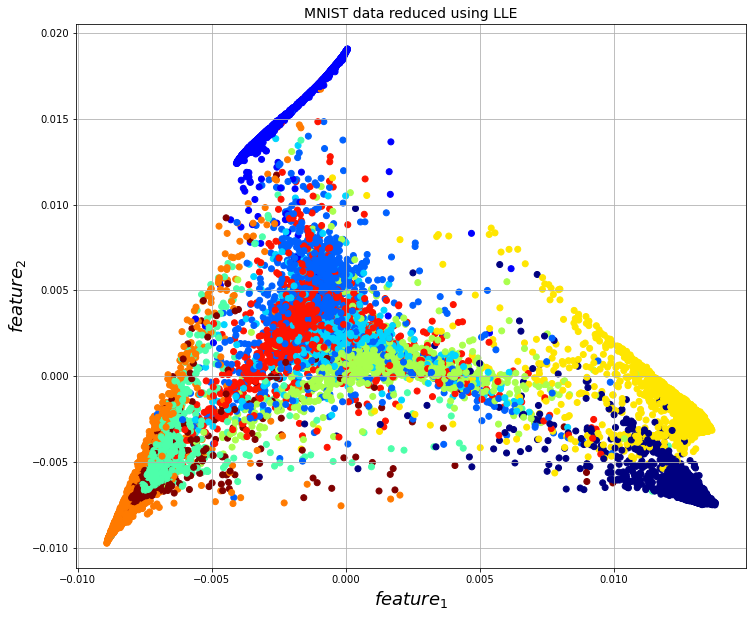

In [46]:
plt.figure(figsize=(12,10))
plt.title("MNIST data reduced using LLE", fontsize=14)
plt.scatter(df_features_reduced_lle[:, 0], df_features_reduced_lle[:, 1], c=df_subset_target,cmap=plt.cm.jet)
plt.xlabel("$feature_1$", fontsize=18)
plt.ylabel("$feature_2$", fontsize=18)
plt.grid(True)

plt.show()

In [47]:
time_start = time.time()
rf_lle = RandomForestClassifier(n_estimators=n_estimators)
rf_lle.fit(X=df_features_reduced_lle[0:16000], y=np.ravel(df_subset_train_y))
print('LLE reduced RF CLF trained! Time elapsed: {} seconds'.format(time.time()-time_start))

LLE reduced RF CLF trained! Time elapsed: 2.1599090099334717 seconds


In [48]:
time_start = time.time()
lle_predictions_rf = rf_lle.predict(df_features_reduced_lle[16000:20000])
print(classification_report(np.ravel(df_subset_test_y), lle_predictions_rf))
print('LLE reduced RF CLF tested! Time elapsed: {} seconds'.format(time.time()-time_start))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       396
           1       0.97      0.98      0.97       459
           2       0.51      0.46      0.48       384
           3       0.62      0.61      0.62       405
           4       0.83      0.91      0.87       371
           5       0.73      0.79      0.76       384
           6       0.94      0.96      0.95       396
           7       0.89      0.87      0.88       423
           8       0.51      0.51      0.51       374
           9       0.86      0.82      0.84       408

    accuracy                           0.79      4000
   macro avg       0.78      0.79      0.78      4000
weighted avg       0.79      0.79      0.79      4000

LLE reduced RF CLF tested! Time elapsed: 0.13289403915405273 seconds


In [49]:
print("Accuracy of RF CLF with LLE:", metrics.accuracy_score(np.ravel(df_subset_test_y), lle_predictions_rf))

Accuracy of RF CLF with LLE: 0.7905


In [50]:
from sklearn.manifold import MDS

In [51]:
N=5000
df_subset_mds = df.loc[:N, :].copy()
df_subset_features_mds = df_subset_mds[[col for col in df.columns if col != target_column]]
df_subset_target_mds = df_subset_mds[target_column]

In [52]:
df_subset_mds_train_X = df_subset_features_mds.iloc[0:4000, :]
df_subset_mds_train_y = df_subset_target_mds.iloc[0:4000]
df_subset_mds_test_X = df_subset_features_mds.iloc[4000:5000, :]
df_subset_mds_test_y = df_subset_target_mds.iloc[4000:5000]

In [53]:
time_start = time.time()
mds = MDS(n_components=2, random_state=41)
df_features_reduced_mds = mds.fit_transform(df_subset_features_mds)
print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 1270.186173915863 seconds


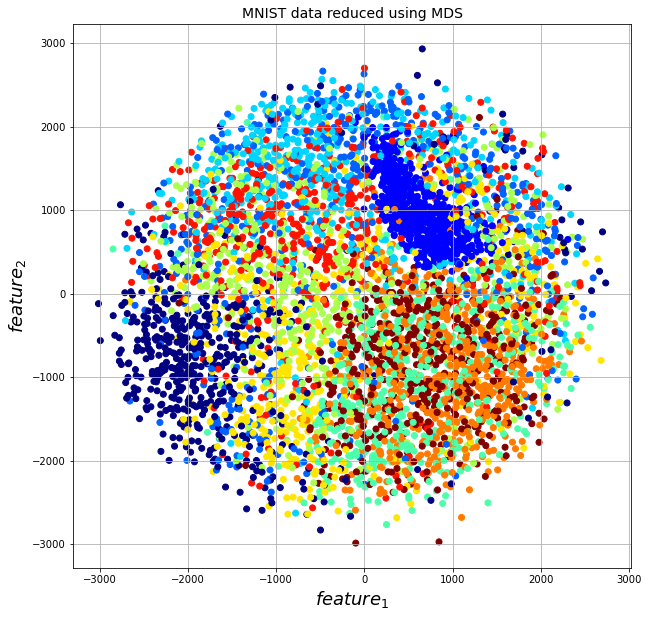

In [54]:
plt.figure(figsize=(10,10))
plt.title("MNIST data reduced using MDS", fontsize=14)
plt.scatter(df_features_reduced_mds[:, 0], df_features_reduced_mds[:, 1], c=df_subset_target_mds,cmap=plt.cm.jet)
plt.xlabel("$feature_1$", fontsize=18)
plt.ylabel("$feature_2$", fontsize=18)
plt.grid(True)

plt.show()

In [55]:
time_start = time.time()
rf_lle = RandomForestClassifier(n_estimators=n_estimators)
rf_lle.fit(X=df_features_reduced_mds[0:4000], y=np.ravel(df_subset_mds_train_y))
print('MDS reduced RF CLF trained! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS reduced RF CLF trained! Time elapsed: 0.7660119533538818 seconds


In [56]:
time_start = time.time()
mds_predictions_rf = rf_lle.predict(df_features_reduced_mds[4000:5000])
print(classification_report(np.ravel(df_subset_mds_test_y), mds_predictions_rf))
print('MDS reduced RF CLF tested! Time elapsed: {} seconds'.format(time.time()-time_start))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65        93
           1       0.82      0.88      0.85       105
           2       0.26      0.23      0.25        99
           3       0.34      0.38      0.36        99
           4       0.27      0.24      0.25        93
           5       0.35      0.30      0.32       100
           6       0.25      0.26      0.26        93
           7       0.40      0.48      0.44       121
           8       0.29      0.27      0.28        96
           9       0.33      0.29      0.31       101

    accuracy                           0.41      1000
   macro avg       0.39      0.40      0.40      1000
weighted avg       0.40      0.41      0.40      1000

MDS reduced RF CLF tested! Time elapsed: 0.0734710693359375 seconds


In [57]:
print("Accuracy of RF CLF with MDS:", metrics.accuracy_score(np.ravel(df_subset_mds_test_y), mds_predictions_rf))

Accuracy of RF CLF with MDS: 0.406


For both LLE and MDS, I had to take a subset of the dataset. LLE worked better than MDS but non of them performed as good as PCA and t-SNE overall on this dataset.<br/>